# Task 1

---

## Web scraping and analysis

This Jupyter notebook includes some code to get you started with web scraping. We will use a package called `BeautifulSoup` to collect the data from the web. Once you've collected your data and saved it into a local `.csv` file you should start with your analysis.

### Scraping data from Skytrax

If you visit [https://www.airlinequality.com] you can see that there is a lot of data there. For this task, we are only interested in reviews related to British Airways and the Airline itself.

If you navigate to this link: [https://www.airlinequality.com/airline-reviews/british-airways] you will see this data. Now, we can use `Python` and `BeautifulSoup` to collect all the links to the reviews and then to collect the text data on each of the individual review links.

In [79]:
import requests
import numpy as np
from bs4 import BeautifulSoup
import pandas as pd
import matplotlib.pyplot as plt
!pip install wordcloud
!pip install gensim
from wordcloud import WordCloud
from wordcloud import STOPWORDS

In [72]:
base_url = "https://www.airlinequality.com/airline-reviews/british-airways"
pages = 50
page_size = 100

reviews = []
review_values = []

for i in range(1, pages + 1):

    print(f"Scraping page {i}")

    # Create URL to collect links from paginated data
    url = f"{base_url}/page/{i}/?sortby=post_date%3ADesc&pagesize={page_size}"

    # Collect HTML data from this page
    response = requests.get(url)

    # Parse content
    content = response.content
    parsed_content = BeautifulSoup(content, 'html.parser')

    review_elements = parsed_content.find_all("div", {"class": "text_content"})
    for review_element in review_elements:
        reviews.append(review_element.get_text())

        # Find the corresponding rating value
        rating_element = review_element.find_next("td", {"class": ["rating-yes", "rating-no"]})
        if rating_element:
            review_values.append(rating_element.get_text().strip())
        else:
            review_values.append(None)  # Handle cases where there is no rating

    print(f"   ---> {len(reviews)} total reviews")

Scraping page 1
   ---> 100 total reviews
Scraping page 2
   ---> 200 total reviews
Scraping page 3
   ---> 300 total reviews
Scraping page 4
   ---> 400 total reviews
Scraping page 5
   ---> 500 total reviews
Scraping page 6
   ---> 600 total reviews
Scraping page 7
   ---> 700 total reviews
Scraping page 8
   ---> 800 total reviews
Scraping page 9
   ---> 900 total reviews
Scraping page 10
   ---> 1000 total reviews
Scraping page 11
   ---> 1100 total reviews
Scraping page 12
   ---> 1200 total reviews
Scraping page 13
   ---> 1300 total reviews
Scraping page 14
   ---> 1400 total reviews
Scraping page 15
   ---> 1500 total reviews
Scraping page 16
   ---> 1600 total reviews
Scraping page 17
   ---> 1700 total reviews
Scraping page 18
   ---> 1800 total reviews
Scraping page 19
   ---> 1900 total reviews
Scraping page 20
   ---> 2000 total reviews
Scraping page 21
   ---> 2100 total reviews
Scraping page 22
   ---> 2200 total reviews
Scraping page 23
   ---> 2300 total reviews
Scrapi

In [73]:
df = pd.DataFrame()
df["reviews"] = reviews
df["review_values"] = review_values
df["reviews"] = df["reviews"].replace(r'✅ Trip Verified',"",regex=True)
df["reviews"] = df["reviews"].replace(r'Not Verified',"",regex=True)

df.head(10)

,reviews,review_values
0,"| Before my flight, I was forced by the groun...",no
1,| British Airways at its best. Outstanding ...,yes
2,| An excellent flight! Despite this being a 4...,yes
3,| I recently traveled with British Airways an...,no
4,| My family and I were booked to leave Lond...,no
5,| We had to change from AA to BA for a fligh...,no
6,| After paying $6500 for tickets for my famil...,no
7,| An excellent flight on BA CityFlyer. The pl...,yes
8,"| Crew were amazing and attentive, nothing ...",yes
9,| I flew internationally for the first time ...,no


Congratulations! Now you have your dataset for this task! The loops above collected 1000 reviews by iterating through the paginated pages on the website. However, if you want to collect more data, try increasing the number of pages!

 The next thing that you should do is clean this data to remove any unnecessary text from each of the rows. For example, "✅ Trip Verified" can be removed from each row if it exists, as it's not relevant to what we want to investigate.

yes, 1542
no, 2299


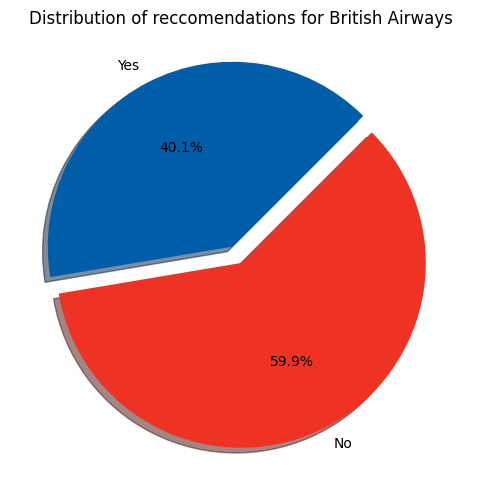

In [91]:
value_counts=df['review_values'].value_counts()
print("yes,", value_counts.get('yes',0))
print("no,", value_counts.get('no',0))

labels = ['Yes', 'No']
sizes = [value_counts.get('yes', 0), value_counts.get('no', 0)]
colors = ['#005daa', '#ee3224']  # Green for 'Yes', Red for 'No'
explode = (0.1, 0)  # "explode" the 'Yes' slice for emphasis

# Plotting the pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, explode=explode, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=45)

plt.title("Distribution of reccomendations for British Airways")
plt.show()

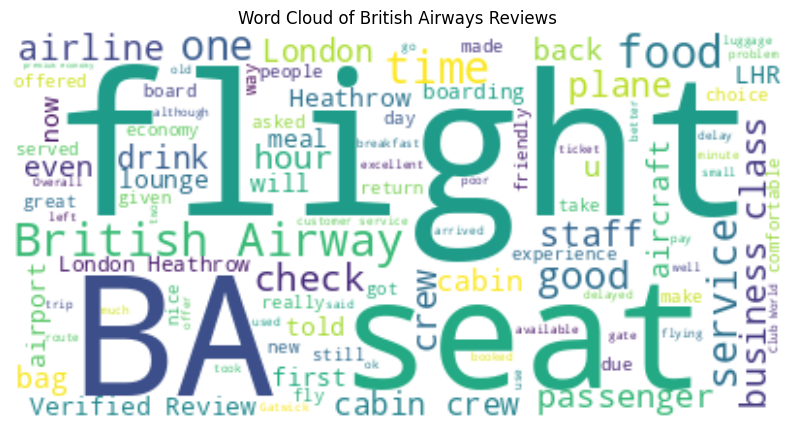

In [86]:
#wordcloud
text = " ".join(review for review in df['reviews'])
stopwords=set(STOPWORDS)
wordcloud = WordCloud(stopwords=stopwords, background_color="white", max_words=100, contour_width=3, contour_color='#a7a9ac').generate(text)


plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud of British Airways Reviews")
plt.show()

Learned about topic modelling while making this. Will try implementing it for better results :)

In [82]:
!pip install nltk
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from gensim import corpora
from gensim.models import LdaModel

nltk.download('stopwords')
nltk.download('punkt')

df = pd.read_csv("data/BA_reviews.csv") # raw data loaded

#pre processing
stop_words = set(stopwords.words('english'))

def preprocess(text):
    # Tokenize the text into words
    tokens = word_tokenize(text.lower())

    tokens = [word for word in tokens if word.isalpha() and word not in stop_words]# Remove stopwords and non-alphabetic tokens
    return tokens

df['processed_reviews'] = df['reviews'].apply(preprocess)

# Create a dictionary representation of the documents.
dictionary = corpora.Dictionary(df['processed_reviews'])

# Filter out extremes
dictionary.filter_extremes(no_below=15, no_above=0.5, keep_n=1000)

# Create the Bag-of-Words (BoW) representation of the documents
corpus = [dictionary.doc2bow(doc) for doc in df['processed_reviews']]

# Set the number of topics
num_topics = 2

# Create the LDA model
lda = LdaModel(corpus, num_topics=num_topics, id2word=dictionary, passes=15)

# Print the topics found by the model
for idx, topic in lda.print_topics(-1):
    print(f"Topic {idx + 1}: {topic}\n")

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


Topic 1: 0.014*"british" + 0.014*"airways" + 0.011*"london" + 0.011*"us" + 0.011*"would" + 0.011*"service" + 0.010*"get" + 0.009*"hours" + 0.009*"staff" + 0.009*"one"

Topic 2: 0.016*"food" + 0.016*"seat" + 0.015*"good" + 0.015*"crew" + 0.014*"service" + 0.014*"cabin" + 0.013*"seats" + 0.013*"class" + 0.010*"business" + 0.010*"economy"



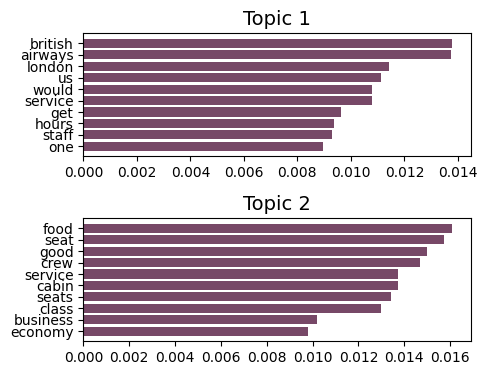

In [88]:
# now to visualize

# Function to get top words for each topic
def get_top_words(lda_model, num_words=10):
    top_words = {}
    for idx in range(num_topics):
        words = lda_model.show_topic(idx, num_words)
        top_words[idx] = [word for word, _ in words]
    return top_words

# Get top words for each topic
top_words = get_top_words(lda)

# Create a figure and axes for plotting
fig, axes = plt.subplots(nrows=num_topics, ncols=1, figsize=(5, 2 * num_topics))
plt.subplots_adjust(hspace=0.5)

# Plot top words for each topic
for idx in range(num_topics):
    words = top_words[idx]
    # Count the occurrences of each word in the topic
    counts = [lda.get_topic_terms(idx, topn=len(words))[i][1] for i in range(len(words))]
    axes[idx].barh(words, counts, color='#774867')
    axes[idx].set_title(f"Topic {idx + 1}", fontsize=14)
    axes[idx].invert_yaxis()  # Reverse the order to have the highest count on top

# Show the plot
plt.show()


In [89]:
df.to_csv("data/BA_reviews.csv")